In [1]:
from src import Helpers
import numpy as np
import pandas as pd
from scipy import stats

In [2]:
movies = Helpers.load_data('movie.metadata.tsv')
summaries = Helpers.load_data("plot_summaries.txt")
character =  Helpers.load_data("character.metadata.tsv")
name =  Helpers.load_data("name.clusters.txt")
tvtropes = Helpers.load_data("tvtropes.clusters.txt")

In [3]:
movies.head()

,Wiki_movie_id,Fb_movie_id,Movie name,release_date,Movie box office revenue,Movie runtime,Movie languages,Movie countries,Movie genres
0,975900,03vyhn,Ghosts of Mars,2001.0,14010832.0,98.0,English,United States of America,"Thriller, Science Fiction, Horror, Adventure, ..."
1,3196793,08yl5d,Getting Away with Murder: The JonBenét Ramsey ...,2000.0,NaN,95.0,English,United States of America,"Mystery, Biographical film, Drama, Crime Drama"
2,28463795,0crgdbh,Brun bitter,1988.0,NaN,83.0,Norwegian,Norway,"Crime Fiction, Drama"
3,9363483,0285_cd,White Of The Eye,1987.0,NaN,110.0,English,United Kingdom,"Thriller, Erotic thriller, Psychological thriller"
4,261236,01mrr1,A Woman in Flames,1983.0,NaN,106.0,German,Germany,Drama


In [4]:
summaries.head()

,Wiki_movie_id,Summary
0,23890098,"Shlykov, a hard-working taxi driver and Lyosha..."
1,31186339,The nation of Panem consists of a wealthy Capi...
2,20663735,Poovalli Induchoodan is sentenced for six yea...
3,2231378,"The Lemon Drop Kid , a New York City swindler,..."
4,595909,Seventh-day Adventist Church pastor Michael Ch...


In [5]:
character.head()

,Wiki_movie_id,Fb_movie_id,release_date,Character,Actor date of birth,Actor gender,Actor_height,Fb_actor_ethnicity_id,Actor_name,Actor_age,Freebase character/actor map ID,Fb_char_id,Fb_actor_id
0,975900,03vyhn,2001.0,Akooshay,1958-08-26,F,1.620,NaN,Wanda De Jesus,42.0,0bgchxw,0bgcj3x,03wcfv7
1,975900,03vyhn,2001.0,Lieutenant Melanie Ballard,1974-08-15,F,1.780,044038p,Natasha Henstridge,27.0,0jys3m,0bgchn4,0346l4
2,975900,03vyhn,2001.0,Desolation Williams,1969-06-15,M,1.727,0x67,Ice Cube,32.0,0jys3g,0bgchn_,01vw26l
3,975900,03vyhn,2001.0,Sgt Jericho Butler,1967-09-12,M,1.750,NaN,Jason Statham,33.0,02vchl6,0bgchnq,034hyc
4,975900,03vyhn,2001.0,Bashira Kincaid,1977-09-25,F,1.650,NaN,Clea DuVall,23.0,02vbb3r,0bgchp9,01y9xg


In [6]:
name.head()

,Name,Fb_char_actor_id
0,Stuart Little,0k3w9c
1,Stuart Little,0k3wcx
2,Stuart Little,0k3wbn
3,John Doe,0jyg35
4,John Doe,0k2_zn


In [7]:
tvtropes.head()

,CharType,Char,Movie,Fb_char_actor_id,Actor
0,absent_minded_professor,Professor Philip Brainard,Flubber,0jy9q0,Robin Williams
1,absent_minded_professor,Professor Keenbean,Richie Rich,02vchl3,Michael McShane
2,absent_minded_professor,Dr. Reinhardt Lane,The Shadow,0k6fkc,Ian McKellen
3,absent_minded_professor,Dr. Harold Medford,Them!,0k6_br,Edmund Gwenn
4,absent_minded_professor,Daniel Jackson,Stargate,0k3rhh,James Spader


### First thing to do merge movies and summaries

In [8]:
love_movies = movies[movies['Movie genres'].str.contains('roman', case=False, na=False)]
movies_sum = love_movies.merge(summaries, how ='left', on= 'Wiki_movie_id')
movies_sum.dropna(subset=['Summary'],inplace=True)
movies_sum

,Wiki_movie_id,Fb_movie_id,Movie name,release_date,Movie box office revenue,Movie runtime,Movie languages,Movie countries,Movie genres,Summary
0,6631279,0gffwj,Little city,1997.0,NaN,93.0,English,United States of America,"Romantic comedy, Ensemble Film, Comedy-drama, ...","Adam, a San Francisco-based artist who works a..."
2,21926710,05p45cv,White on Rice,2009.0,NaN,82.0,,United States of America,"Romantic comedy, Romance Film, Comedy, Indie",Jimmy ([[Hiroshi Watanabe loves dinosaurs and...
3,20604092,0523t_1,Anbu Thozhi,2007.0,NaN,NaN,Tamil,India,Romance Film,The film opens with a simpleton from a small v...
4,29528534,04j0lfk,Anokha Rishta,1986.0,NaN,180.0,Hindi,India,"World cinema, Musical, Drama, Romantic drama, ...","Mary, an orphan lives in an orphanage run by n..."
6,26067101,0b6c_nw,Siam Sunset,1999.0,NaN,91.0,,"Australia, New Zealand","Romantic comedy, Romance Film, Comedy, World c...",Perry is an English chemist working for a pain...
...,...,...,...,...,...,...,...,...,...,...
11123,26219108,0b76gfr,The Leopard Woman,NaN,NaN,70.0,"Silent film, English",United States of America,"Silent film, Romance Film",The story is set in Africa. Two rival European...
11124,1191380,04f_y7,Wilde,1997.0,2158775.0,118.0,English,"Kingdom of Great Britain, Japan, England, Unit...","LGBT, Biography, Japanese Movies, History, Gay...",The film opens with Oscar Wilde's 1882 visit t...
11125,54540,0f7hw,Coming to America,1988.0,288752301.0,117.0,English,United States of America,"Romantic comedy, Comedy of manners, Drama, Com...","Akeem Joffer , the prince and heir to the thro..."
11126,1673588,05mc7l,The Brother from Another Planet,1984.0,NaN,104.0,"English , Spanish",United States of America,"Science Fiction, Indie, Cult, Drama, Comedy, R...","Joe Morton stars in this dramatic comedy, set ..."


In [9]:
love_movies = movies_sum[['Wiki_movie_id','Summary']]
love_movies.head()

,Wiki_movie_id,Summary
0,6631279,"Adam, a San Francisco-based artist who works a..."
2,21926710,Jimmy ([[Hiroshi Watanabe loves dinosaurs and...
3,20604092,The film opens with a simpleton from a small v...
4,29528534,"Mary, an orphan lives in an orphanage run by n..."
6,26067101,Perry is an English chemist working for a pain...


In [10]:
# Merge DataFrames based on the 'ID' column
merged_df = pd.merge(love_movies, character, on='Wiki_movie_id', how='inner')

#Remove Rows when there is Nan for the character
merged_df.dropna(subset=['Character'],inplace=True)


# Display the resulting DataFrame
merged_df = merged_df[['Wiki_movie_id','Summary','Actor_age','Actor gender','release_date','Character']]
merged_df

,Wiki_movie_id,Summary,Actor_age,Actor gender,release_date,Character
1,6631279,"Adam, a San Francisco-based artist who works a...",33.0,F,1997.0,Rebecca
2,6631279,"Adam, a San Francisco-based artist who works a...",37.0,F,1997.0,Nina
18,29528534,"Mary, an orphan lives in an orphanage run by n...",30.0,F,1986.0,Dr. Pramila
19,29528534,"Mary, an orphan lives in an orphanage run by n...",43.0,M,1986.0,Robert Bob
24,29528534,"Mary, an orphan lives in an orphanage run by n...",30.0,F,1986.0,Dr. Pramila
...,...,...,...,...,...,...
64417,54540,"Akeem Joffer , the prince and heir to the thro...",39.0,M,1988.0,Hold-Up Man
64418,54540,"Akeem Joffer , the prince and heir to the thro...",20.0,M,1988.0,Boy Getting Haircut
64419,54540,"Akeem Joffer , the prince and heir to the thro...",13.0,F,1988.0,Stuck Up Girl
64421,1673588,"Joe Morton stars in this dramatic comedy, set ...",50.0,M,1984.0,Walter


In [11]:
merged_df.drop_duplicates(inplace=True)
merged_df

,Wiki_movie_id,Summary,Actor_age,Actor gender,release_date,Character
1,6631279,"Adam, a San Francisco-based artist who works a...",33.0,F,1997.0,Rebecca
2,6631279,"Adam, a San Francisco-based artist who works a...",37.0,F,1997.0,Nina
18,29528534,"Mary, an orphan lives in an orphanage run by n...",30.0,F,1986.0,Dr. Pramila
19,29528534,"Mary, an orphan lives in an orphanage run by n...",43.0,M,1986.0,Robert Bob
35,12053509,"Randy Bodek is a rebellious college slacker, ...",59.0,M,1989.0,Harry Bruckner
...,...,...,...,...,...,...
64417,54540,"Akeem Joffer , the prince and heir to the thro...",39.0,M,1988.0,Hold-Up Man
64418,54540,"Akeem Joffer , the prince and heir to the thro...",20.0,M,1988.0,Boy Getting Haircut
64419,54540,"Akeem Joffer , the prince and heir to the thro...",13.0,F,1988.0,Stuck Up Girl
64421,1673588,"Joe Morton stars in this dramatic comedy, set ...",50.0,M,1984.0,Walter


In [12]:
#We want to know if we need to perform another analysis on the summary to extract couples
merged_df['Movies_with_same_id'] = merged_df.groupby('Wiki_movie_id')['Wiki_movie_id'].transform('count')
merged_df

,Wiki_movie_id,Summary,Actor_age,Actor gender,release_date,Character,Movies_with_same_id
1,6631279,"Adam, a San Francisco-based artist who works a...",33.0,F,1997.0,Rebecca,2
2,6631279,"Adam, a San Francisco-based artist who works a...",37.0,F,1997.0,Nina,2
18,29528534,"Mary, an orphan lives in an orphanage run by n...",30.0,F,1986.0,Dr. Pramila,2
19,29528534,"Mary, an orphan lives in an orphanage run by n...",43.0,M,1986.0,Robert Bob,2
35,12053509,"Randy Bodek is a rebellious college slacker, ...",59.0,M,1989.0,Harry Bruckner,14
...,...,...,...,...,...,...,...
64417,54540,"Akeem Joffer , the prince and heir to the thro...",39.0,M,1988.0,Hold-Up Man,21
64418,54540,"Akeem Joffer , the prince and heir to the thro...",20.0,M,1988.0,Boy Getting Haircut,21
64419,54540,"Akeem Joffer , the prince and heir to the thro...",13.0,F,1988.0,Stuck Up Girl,21
64421,1673588,"Joe Morton stars in this dramatic comedy, set ...",50.0,M,1984.0,Walter,2


In [13]:
# Keep only rows where 'Character' is in 'Summary'
df_filtered_1 = merged_df[merged_df.apply(lambda row: row['Character'] in row['Summary'], axis=1)]

df_filtered_1 = df_filtered_1.drop(columns=['Movies_with_same_id'])
#We want to know if we need to perform another analysis on the summary to extract couples
df_filtered_1['Movies_with_same_id'] = df_filtered_1.groupby('Wiki_movie_id')['Wiki_movie_id'].transform('count')

# Display the resulting DataFrame
df_filtered_1

,Wiki_movie_id,Summary,Actor_age,Actor gender,release_date,Character,Movies_with_same_id
1,6631279,"Adam, a San Francisco-based artist who works a...",33.0,F,1997.0,Rebecca,2
2,6631279,"Adam, a San Francisco-based artist who works a...",37.0,F,1997.0,Nina,2
18,29528534,"Mary, an orphan lives in an orphanage run by n...",30.0,F,1986.0,Dr. Pramila,1
36,12053509,"Randy Bodek is a rebellious college slacker, ...",23.0,M,1989.0,Randy Bodek,7
38,12053509,"Randy Bodek is a rebellious college slacker, ...",40.0,M,1989.0,Joe Bodek,7
...,...,...,...,...,...,...,...
64394,1191380,The film opens with Oscar Wilde's 1882 visit t...,27.0,M,1997.0,Robbie Ross,3
64399,54540,"Akeem Joffer , the prince and heir to the thro...",31.0,F,1988.0,Imani Izzi,4
64402,54540,"Akeem Joffer , the prince and heir to the thro...",32.0,M,1988.0,Semmi,4
64403,54540,"Akeem Joffer , the prince and heir to the thro...",57.0,M,1988.0,King Jaffe Joffer,4


In [14]:
#Only keep when there is only 2 people
# Keep only rows where 'Movies_with_same_id' is equal to 2
df_filtered = df_filtered_1[df_filtered_1['Movies_with_same_id'] == 2]

# Display the resulting DataFrame
df_filtered

,Wiki_movie_id,Summary,Actor_age,Actor gender,release_date,Character,Movies_with_same_id
1,6631279,"Adam, a San Francisco-based artist who works a...",33.0,F,1997.0,Rebecca,2
2,6631279,"Adam, a San Francisco-based artist who works a...",37.0,F,1997.0,Nina,2
378,24021571,Leslie Wright is a straight-shooting physical...,40.0,F,2010.0,Leslie Wright,2
379,24021571,Leslie Wright is a straight-shooting physical...,38.0,M,2010.0,Scott McKnight,2
452,9086301,"In every port, sailor Bill, Spencer Tracy, mee...",31.0,M,1931.0,Bill,2
...,...,...,...,...,...,...,...
64042,5667692,Detective Agustín Rejas is tracking the self-...,46.0,F,2002.0,Yolanda,2
64115,8398736,"The story is about Gaurav Gupta [Ajay Devgan],...",26.0,F,2005.0,Natasha,2
64117,8398736,"The story is about Gaurav Gupta [Ajay Devgan],...",36.0,M,2005.0,Gaurav Gupta,2
64189,5971762,British newlywed Regina Lambert lives in Paris...,45.0,M,2002.0,Charlie,2


In [15]:
import seaborn as sns
import matplotlib.pyplot as plt

In [16]:
# Create separate DataFrames for 'F' and 'M' actors
df_F = df_filtered[df_filtered['Actor gender'] == 'F']
df_M = df_filtered[df_filtered['Actor gender'] == 'M']

# Merge DataFrames based on 'wiki_movie_id'
df_merged = pd.merge(df_F, df_M, on='Wiki_movie_id', suffixes=('_F', '_M'))
df_merged = df_merged[['Wiki_movie_id','Actor_age_F','Actor_age_M','release_date_M']]
df_merged

,Wiki_movie_id,Actor_age_F,Actor_age_M,release_date_M
0,24021571,40.0,38.0,2010.0
1,9086301,20.0,31.0,1931.0
2,20694087,19.0,48.0,2009.0
3,5363369,41.0,29.0,1979.0
4,29004995,21.0,24.0,2010.0
...,...,...,...,...
598,28986019,NaN,NaN,2011.0
599,1226363,NaN,NaN,1946.0
600,5667692,46.0,33.0,2002.0
601,8398736,26.0,36.0,2005.0


In [17]:
# Create an empty matrix with dimensions 81x81
matrix_size = 81
age_matrix = np.zeros((matrix_size, matrix_size))

# Iterate over the rows of the DataFrame and increment the corresponding matrix cell
for _, row in df_merged.iterrows():
    if not pd.isna(row['Actor_age_F']) and not pd.isna(row['Actor_age_M']):
        age_matrix[int(row['Actor_age_F']), int(row['Actor_age_M'])] += 1

# Convert the matrix to a DataFrame
age_matrix_df = pd.DataFrame(age_matrix, index=range(matrix_size), columns=range(matrix_size))

# Print or use age_matrix_df as needed
age_matrix_df

,0,1,2,3,4,5,6,7,8,9,...,71,72,73,74,75,76,77,78,79,80
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
76,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
77,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
78,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
79,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


<Axes: title={'center': 'Actor Age Heatmap'}>

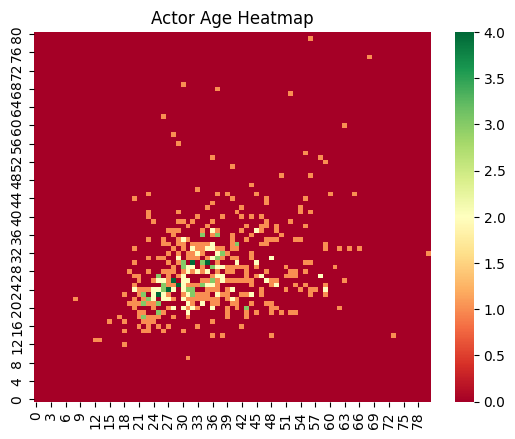

In [18]:
# Sort the index and columns of the heatmap DataFrame
age_matrix_df = age_matrix_df.sort_index(ascending=False)
age_matrix_df = age_matrix_df.sort_index(axis=1)

plt.title('Actor Age Heatmap')
plt.ylabel('Actor Age (Male)')
plt.xlabel('Actor Age (Female)')

sns.heatmap(age_matrix_df, annot=False,cmap='RdYlGn')

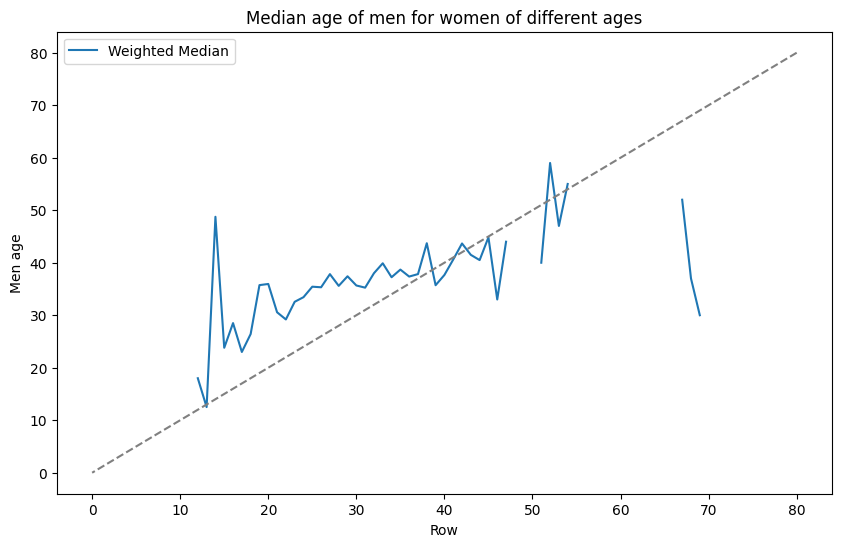

In [19]:
# Calculate the weighted median with a check for zero weights
weighted_median_per_row = age_matrix_df.apply(lambda row: np.average(age_matrix_df.columns.astype(int), weights=row) if row.sum() != 0 else np.nan, axis=1)

# Create a plot
plt.figure(figsize=(10, 6))
plt.plot(age_matrix_df.index, weighted_median_per_row, label='Weighted Median')

# Add labels and title
plt.xlabel('Row')
plt.ylabel('Men age')
plt.title('Median age of men for women of different ages')
plt.legend()

plt.plot(age_matrix_df.index, age_matrix_df.index, label='Identity', linestyle='--', color='gray')
# Show the plot
plt.show()

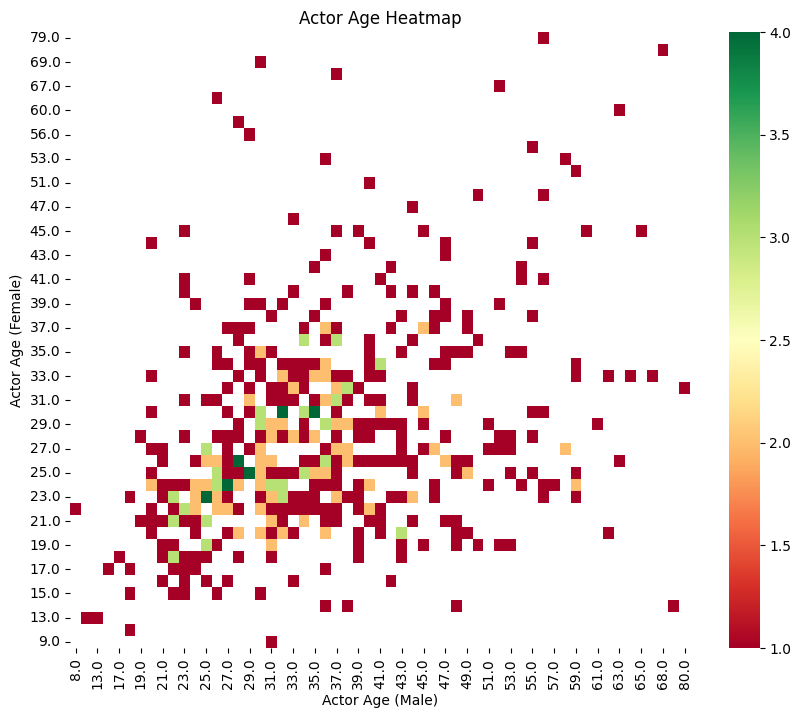

In [20]:
df_heatmap = pd.crosstab(df_merged['Actor_age_F'],df_merged['Actor_age_M'], values = 1,
                  margins=False, aggfunc='sum')

# Sort the index and columns of the heatmap DataFrame
df_heatmap = df_heatmap.sort_index(ascending=False)
df_heatmap = df_heatmap.sort_index(axis=1)

# Plot the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(df_heatmap, annot=False,cmap='RdYlGn')


plt.title('Actor Age Heatmap')
plt.xlabel('Actor Age (Male)')
plt.ylabel('Actor Age (Female)')

plt.show()


In [21]:
df_merged['Age_Difference'] =df_merged['Actor_age_M'] - df_merged['Actor_age_F']
df_merged

,Wiki_movie_id,Actor_age_F,Actor_age_M,release_date_M,Age_Difference
0,24021571,40.0,38.0,2010.0,-2.0
1,9086301,20.0,31.0,1931.0,11.0
2,20694087,19.0,48.0,2009.0,29.0
3,5363369,41.0,29.0,1979.0,-12.0
4,29004995,21.0,24.0,2010.0,3.0
...,...,...,...,...,...
598,28986019,NaN,NaN,2011.0,NaN
599,1226363,NaN,NaN,1946.0,NaN
600,5667692,46.0,33.0,2002.0,-13.0
601,8398736,26.0,36.0,2005.0,10.0


In [22]:
df_merged['Age_Difference'].describe()

count    517.000000
mean       7.129594
std       11.473623
min      -39.000000
25%        1.000000
50%        6.000000
75%       13.000000
max       59.000000
Name: Age_Difference, dtype: float64

In [23]:
df_merged['Actor_age_F'].describe()

count    555.000000
mean      28.246847
std        8.801787
min        9.000000
25%       23.000000
50%       26.000000
75%       32.000000
max       79.000000
Name: Actor_age_F, dtype: float64

In [24]:
df_merged['Actor_age_M'].describe()

count    540.000000
mean      35.279630
std       10.623492
min        8.000000
25%       27.750000
50%       34.000000
75%       41.000000
max       80.000000
Name: Actor_age_M, dtype: float64

c:\Users\erwan\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\erwan\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\erwan\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\erwan\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na opti

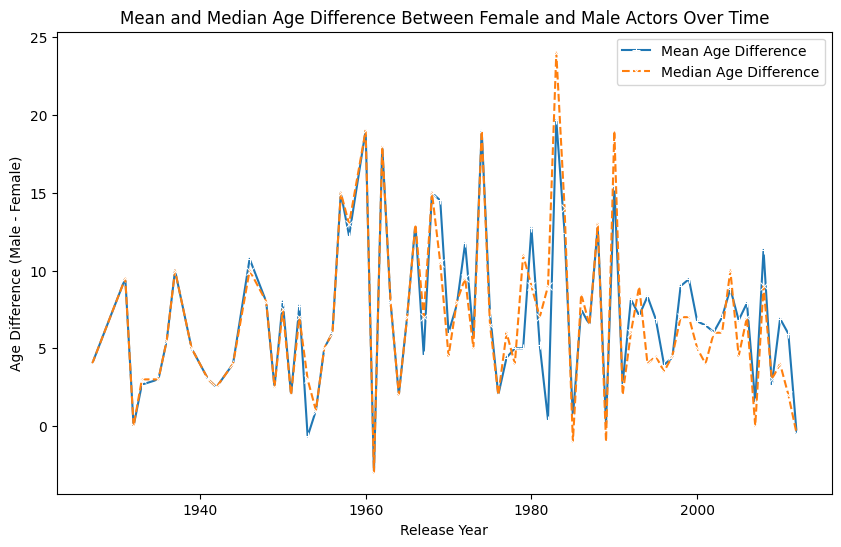

In [25]:
# Drop rows with missing values in the Age_Difference column
df = df_merged.dropna(subset=['Age_Difference'])

# Group by release year and calculate mean, median, and confidence interval for each group
grouped_df = df.groupby('release_date_M')['Age_Difference'].agg(['mean', 'median', 'count', 'sem'])
grouped_df['ci_low'], grouped_df['ci_high'] = zip(*grouped_df.apply(
    lambda row: stats.t.interval(0.95, row['count'] - 1, loc=row['mean'], scale=row['sem']), axis=1
))

# Plotting
plt.figure(figsize=(10, 6))
sns.lineplot(x=grouped_df.index, y=grouped_df['mean'], marker='+', label='Mean Age Difference')
sns.lineplot(x=grouped_df.index, y=grouped_df['median'], marker='x', label='Median Age Difference', linestyle='--')
#plt.fill_between(grouped_df.index, grouped_df['ci_low'], grouped_df['ci_high'], color='gray', alpha=0.3, label='95% CI')

# Customize the plot
plt.title('Mean and Median Age Difference Between Female and Male Actors Over Time')
plt.xlabel('Release Year')
plt.ylabel('Age Difference (Male - Female)')
plt.legend()
plt.show()

In [26]:
df_filtered_1

,Wiki_movie_id,Summary,Actor_age,Actor gender,release_date,Character,Movies_with_same_id
1,6631279,"Adam, a San Francisco-based artist who works a...",33.0,F,1997.0,Rebecca,2
2,6631279,"Adam, a San Francisco-based artist who works a...",37.0,F,1997.0,Nina,2
18,29528534,"Mary, an orphan lives in an orphanage run by n...",30.0,F,1986.0,Dr. Pramila,1
36,12053509,"Randy Bodek is a rebellious college slacker, ...",23.0,M,1989.0,Randy Bodek,7
38,12053509,"Randy Bodek is a rebellious college slacker, ...",40.0,M,1989.0,Joe Bodek,7
...,...,...,...,...,...,...,...
64394,1191380,The film opens with Oscar Wilde's 1882 visit t...,27.0,M,1997.0,Robbie Ross,3
64399,54540,"Akeem Joffer , the prince and heir to the thro...",31.0,F,1988.0,Imani Izzi,4
64402,54540,"Akeem Joffer , the prince and heir to the thro...",32.0,M,1988.0,Semmi,4
64403,54540,"Akeem Joffer , the prince and heir to the thro...",57.0,M,1988.0,King Jaffe Joffer,4


In [27]:
df_filtered_1[df_filtered_1['Wiki_movie_id']== 54540]['Summary'].unique()

array(['Akeem Joffer , the prince and heir to the throne of a fictitious, wealthy African country called Zamunda, is discontented with being pampered all his life. The final straw comes when his parents, King Jaffe Joffer  and Queen Aeoleon , present him with a bride-to-be, Imani Izzi , whom he has never met and who is trained to obey his every command. Seeing that Imani is too subservient and offers nothing for his intellect, Akeem concocts a plan to travel to the United States to find an independent-minded wife he can both love and respect and who accepts him for himself, not his status. He and his friend and personal aide, Semmi  arrive in Queens, a borough of New York City, because according to Akeem, "What better place to find a queen than the city of Queens?" They rent a run-down apartment in the neighborhood of Long Island City and begin working at a local fast food restaurant called McDowell\'s , passing themselves off as poor foreign students. Akeem falls in love with McDowell

In [28]:
df_filtered_1[df_filtered_1['Wiki_movie_id']== 12053509]['Summary'].unique()

array(['Randy Bodek  is a rebellious college slacker, living with his girlfriend Jenny . His father, furious over Randy\'s lack of direction or work ethic, forces Randy to come back home and get a job. Randy eventually finds work as a pizza delivery boy at Señor Pizza, but his pitiful earnings will not allow him to fund college on his own and he despairs of being able to return to Jenny next semester. In his capacity as delivery boy, he soon makes the acquaintance of a middle-aged, wealthy Italian woman, Alex Barnett , who pampers and seduces him. She and Randy enjoy a quiet, brief, passionate affair. During the affair, Randy\'s increasingly stylish appearance, unusually chipper demeanor and gifts being delivered by Randy\'s handsome Italian co-worker, Tony , inspire Randy\'s father to believe his son is gay. Eventually, Alex must return to Italy. Randy is disappointed; he has enjoyed his relationship with Alex, both for the lavish gifts of money and expensive clothing, and for the exp

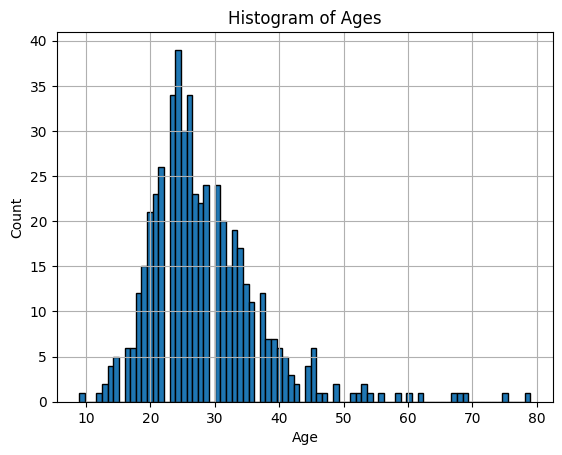

In [35]:
# Remove NaN values and create histogram
df['Actor_age_F'].dropna().hist(bins=80, edgecolor='black')  # Adjust the number of bins as needed

plt.xlabel('Age')
plt.ylabel('Count')
plt.title('Histogram of Ages')

plt.show()

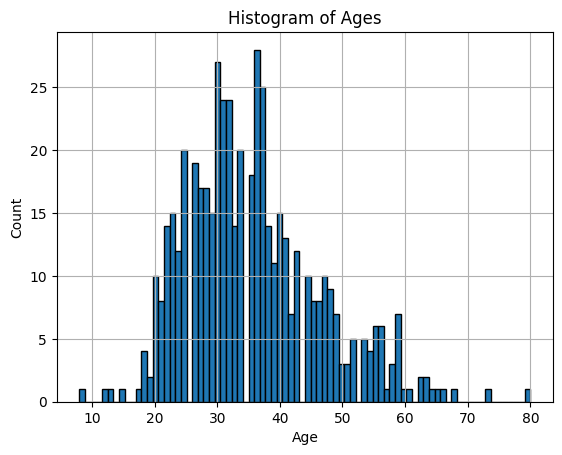

In [36]:
# Remove NaN values and create histogram
df['Actor_age_M'].dropna().hist(bins=80, edgecolor='black')  # Adjust the number of bins as needed

plt.xlabel('Age')
plt.ylabel('Count')
plt.title('Histogram of Ages')

plt.show()